# 1. Import Library & Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

# 2. Overview of the Data

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


### Generate Random Number to Show Image

In [ ]:
number = random.randint(0, 42000)
number

38085

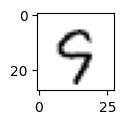

In [ ]:
plt.figure(figsize=(1, 1))
plt.imshow(train_df.iloc[number, 1:].values.reshape(28, 28), cmap=plt.cm.binary)

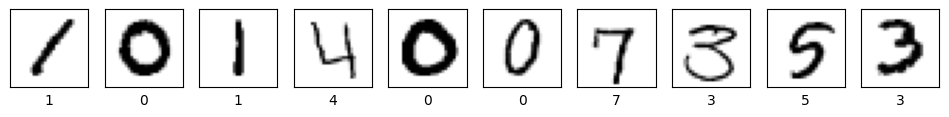

In [ ]:
# code to show 10 images
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_df.iloc[i, 1:].values.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_df.iloc[i, 0])

###  Scaling and Label Separation

In [ ]:
# converting number 0 to 256 to 0 to 1
x_train_df = train_df.iloc[:, 1:].values / 256
x_test_df = test_df.iloc[:, :].values / 256

In [ ]:
y_train_df = train_df.iloc[:, 0].values
y_train_df[number]

9

In [ ]:
x_train_df.shape, x_test_df.shape

((42000, 784), (28000, 784))

# 3. Train and Validation Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42)

# 5. CNN

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
              batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1050/1050 [==============================] - 12s 4ms/step - loss: 0.2873 - accuracy: 0.9097 - val_loss: 0.1123 - val_accuracy: 0.9642
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.0727 - val_accuracy: 0.9788
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0528 - val_accuracy: 0.9825
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0454 - val_accuracy: 0.9868
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0446 - val_accuracy: 0.9868
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0607 - val_accuracy: 0.9814
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0415 - val_accuracy

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.287328,0.909673,0.112264,0.964167
1,0.073950,0.976994,0.072666,0.978810
2,0.052574,0.983929,0.052814,0.982500
3,0.038982,0.988065,0.045353,0.986786
4,0.031533,0.990476,0.044605,0.986786


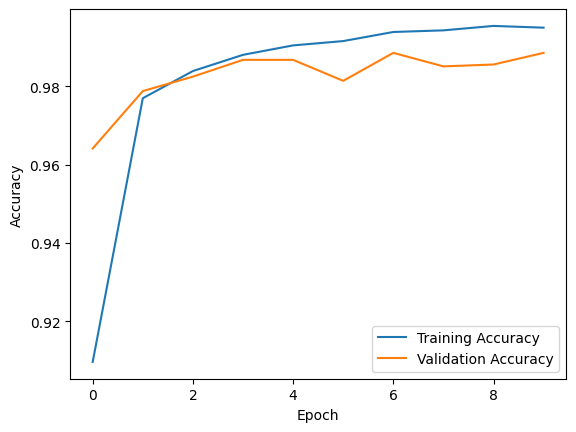

In [ ]:
# Example: Plotting training history
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.9886
Test Accuracy: 0.9885714054107666


In [ ]:
y_predicted = cnn_model.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 1s 2ms/step


In [ ]:
y_clsses = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [ ]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4])

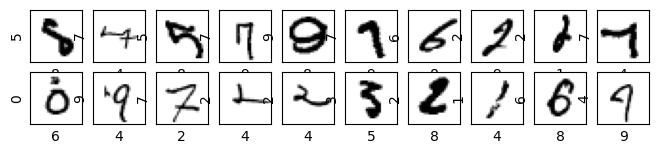

In [ ]:
plt.figure(figsize=(8, 8))
count = 0  # Initialize a count variable

for i in range(x_test.shape[0]):
    if y_clsses[i] != y_test[i]:
        count += 1
        if count > 20:
            break  # Exit the loop if more than 100 subplots are created
        plt.subplot(10, 10, count)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y_clsses[i])
        plt.ylabel(y_test[i])

plt.show()

In [ ]:
y_predicted_x_test_df = cnn_model.predict(x_test_df.reshape(-1, 28, 28, 1))
y_predicted_x_test_df

875/875 [==============================] - 1s 2ms/step


array([[2.7261650e-14, 1.9566407e-10, 1.0000000e+00, ..., 4.7919757e-10,
        6.2055876e-09, 1.1085975e-12],
       [9.9999976e-01, 2.3459661e-11, 3.9839971e-08, ..., 8.7479748e-09,
        4.3778353e-08, 3.6972882e-08],
       [2.5115847e-09, 3.8382669e-12, 1.9026187e-08, ..., 5.1123938e-10,
        6.9831977e-08, 9.9999905e-01],
       ...,
       [2.8565641e-19, 1.4268998e-13, 4.3118192e-17, ..., 7.9755808e-17,
        3.4482603e-14, 9.4339487e-14],
       [1.2925952e-08, 2.4054326e-13, 1.1121798e-09, ..., 1.9357749e-09,
        3.6638287e-08, 9.9998605e-01],
       [1.1318817e-16, 1.4208933e-11, 9.9999964e-01, ..., 1.4803329e-11,
        3.3786165e-07, 2.1079850e-12]], dtype=float32)

In [ ]:
y_classes_x_test_df = [np.argmax(i) for i in y_predicted_x_test_df]
y_classes_x_test_df[:20]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]